# Explore, Transform, Load

- Use a log transformation to minimize non-stationarity 
- Use rolling means to reduce non-stationarity 
- Use differencing to reduce non-stationarity 
- Use rolling statistics as a check for stationarity 
- Create visualizations of transformed time series as a visual aid to determine if stationarity has been achieved 
- Use the Dickey-Fuller test and conclude whether or not a dataset is exhibiting stationarity 


#### Import libraries

In [77]:
#from libraries import *
%run libraries.py

## Detrending data

Load previously saved data

In [14]:
ts = load_data()
ts.head()

,close
timestamp,
2020-07-13,9200.00
2020-07-14,9116.00
2020-07-15,9156.00
2020-07-16,9044.02
2020-07-17,9087.00


Plot this time series. 

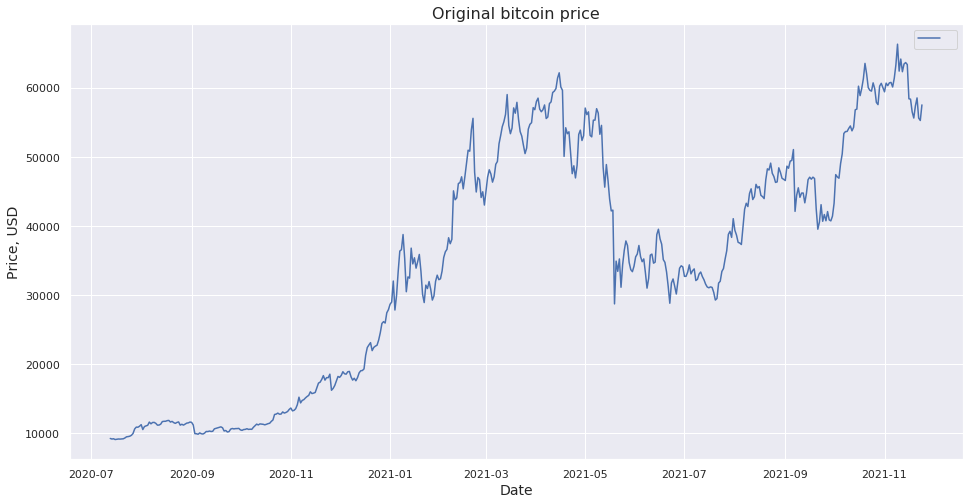

In [54]:
plot_ts([[ts]], 'Original bitcoin price')

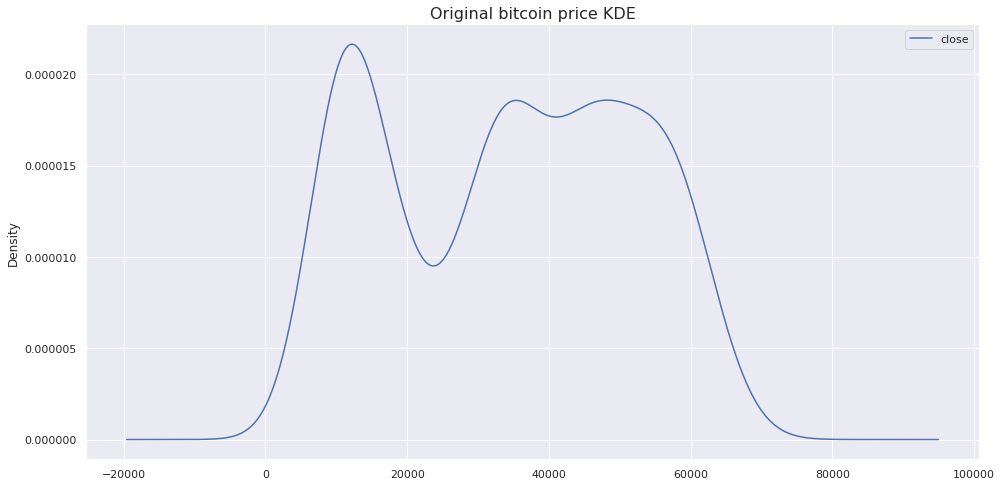

In [58]:
kde_plot_ts(ts, 'Original bitcoin price KDE')

#### Check for the stationarity of a given time series using rolling stats and DF test

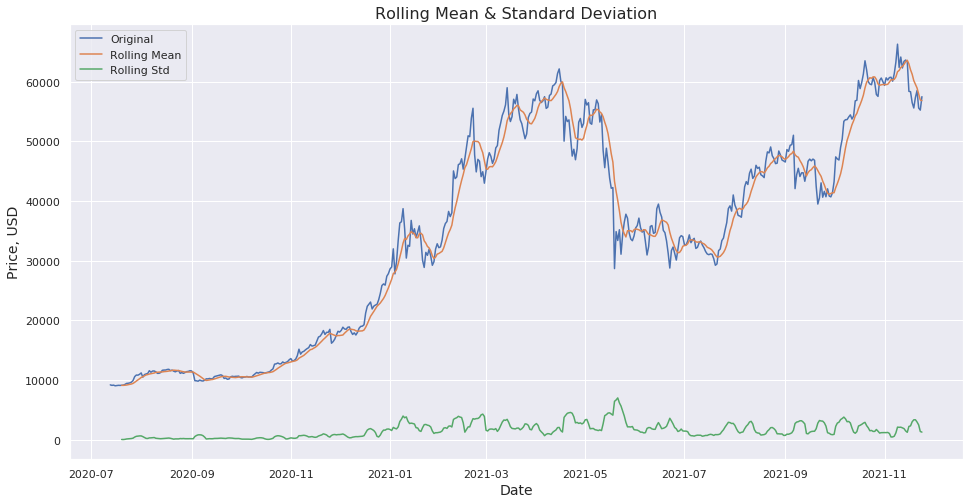

Test Statistic                  -1.117968
p-value                          0.707854
#Lags Used                       8.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64

In [37]:
check_stationarity(ts)

### Perform a log and square root transform

Plot a log transform of the original time series (`ts`). 

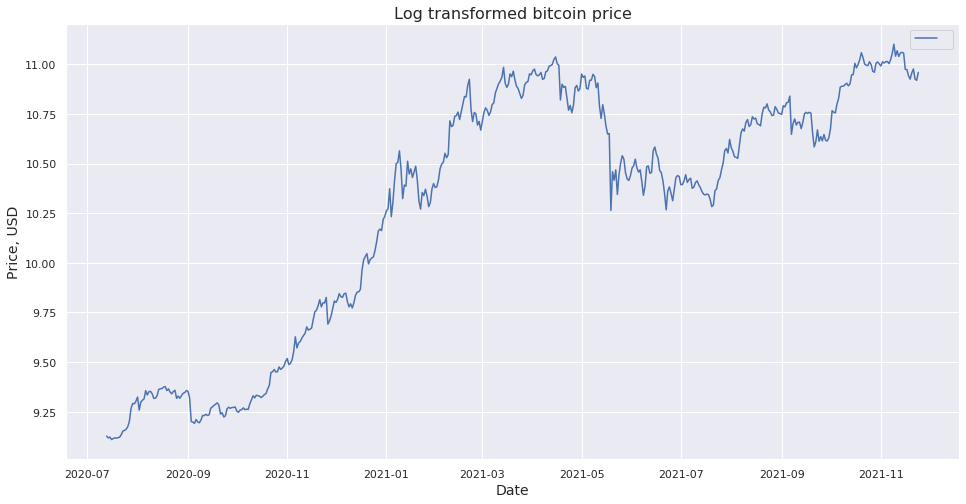

In [38]:
ts_log = np.log(ts)
plot_ts([[ts_log]], 'Log transformed bitcoin price')

Plot a square root  transform of the original time series (`ts`). 

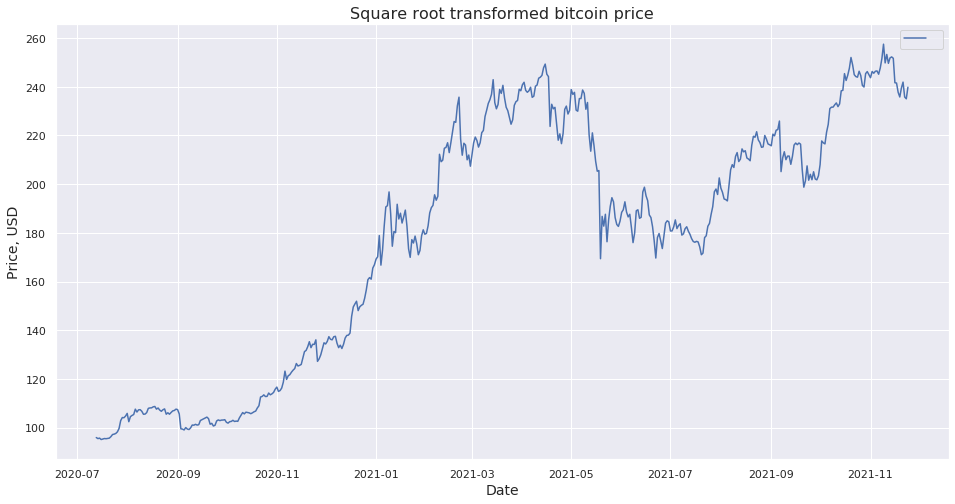

In [40]:
data = np.sqrt(ts)
plot_ts([[data]], 'Square root transformed bitcoin price')

Let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using log transformed time series, with a time window of 7. <br>
Plot the log transformed time series and the rolling mean together.

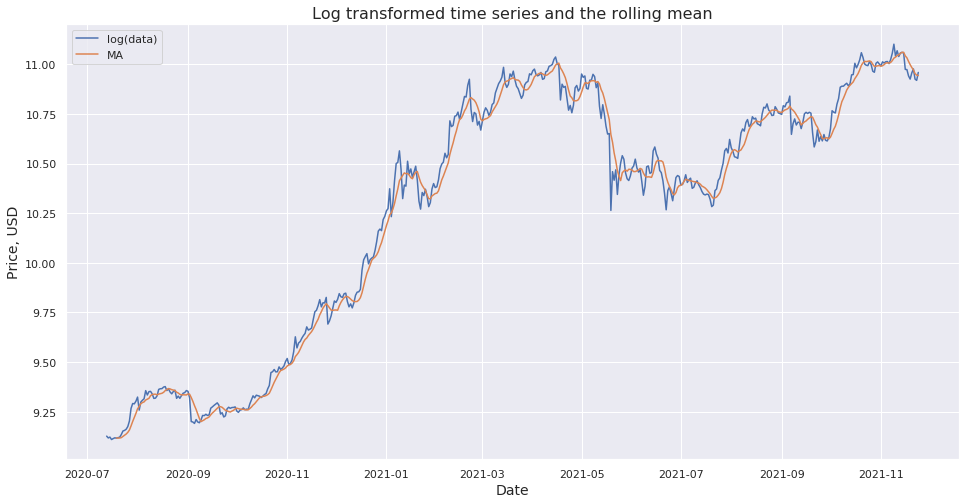

In [41]:
roll_mean = ts_log.rolling(window=7).mean()
plot_ts([[ts_log, 'log(data)'], [roll_mean, 'MA']], 'Log transformed time series and the rolling mean')

Subtract rolling mean from the log transformed time series and plot result.

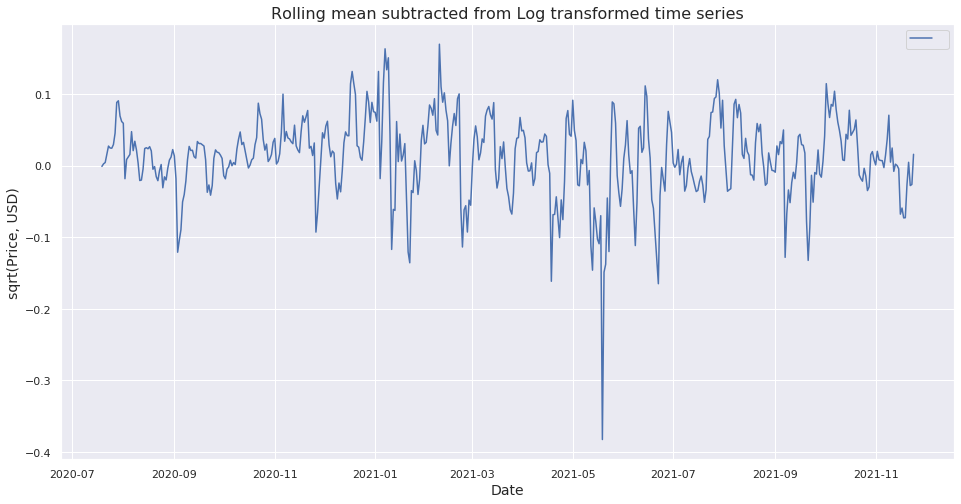

In [67]:
# Subtract the moving average from the log transformed data
ts_log_minus_roll_mean = ts_log - roll_mean

# Drop the missing values
ts_log_minus_roll_mean.dropna(inplace=True)

# Plot
plot_ts([[ts_log_minus_roll_mean]], 'Rolling mean subtracted from Log transformed time series', ylabel='sqrt(Price, USD)')

Again check stationarity to see if this series is stationary.

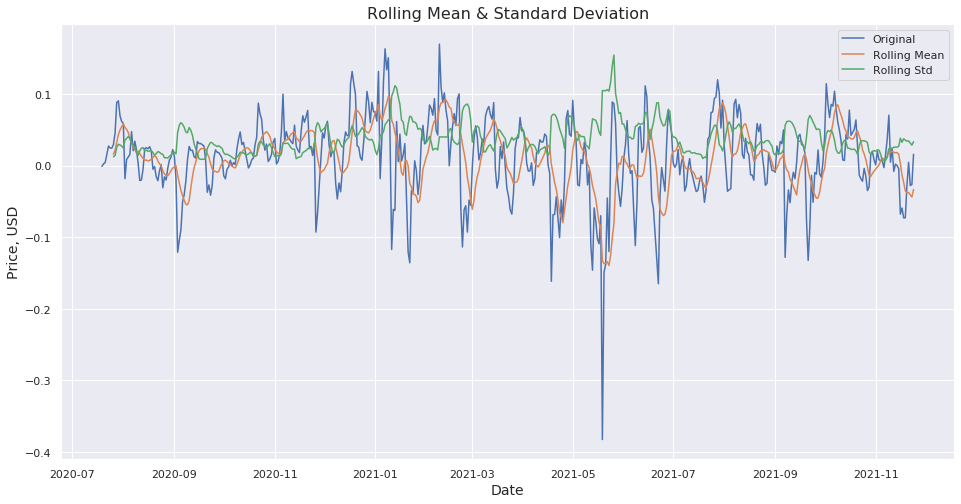

Test Statistic                  -5.531207
p-value                          0.000002
#Lags Used                       8.000000
Number of Observations Used    485.000000
Critical Value (1%)             -3.443905
Critical Value (5%)             -2.867518
Critical Value (10%)            -2.569954
dtype: float64

In [65]:
check_stationarity(ts_log_minus_roll_mean)

##### p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to Dickey-Fuller test

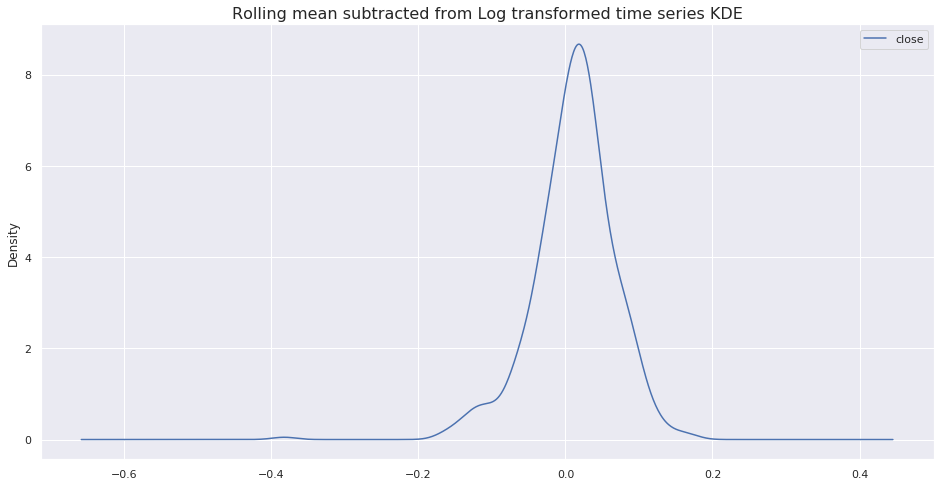

In [68]:
kde_plot_ts(ts_log_minus_roll_mean, 'Rolling mean subtracted from Log transformed time series KDE')

#### KDE could be better

## Subtracting the weighted rolling mean

Calculate the exponential *weighted* rolling mean (MA) with a halflife of 4 using log-transformed data.

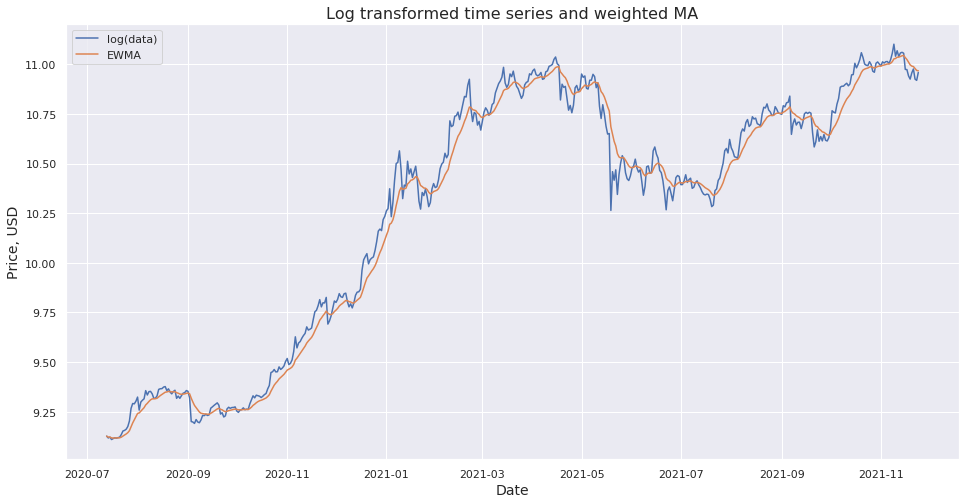

In [60]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = ts_log.ewm(halflife=4).mean()

# Plot
plot_ts([[ts_log, 'log(data)'], [exp_roll_mean, 'EWMA']], 'Log transformed time series and weighted MA')

Let's subtract this exponential weighted rolling mean from the log transformed data and plot the resulting time series

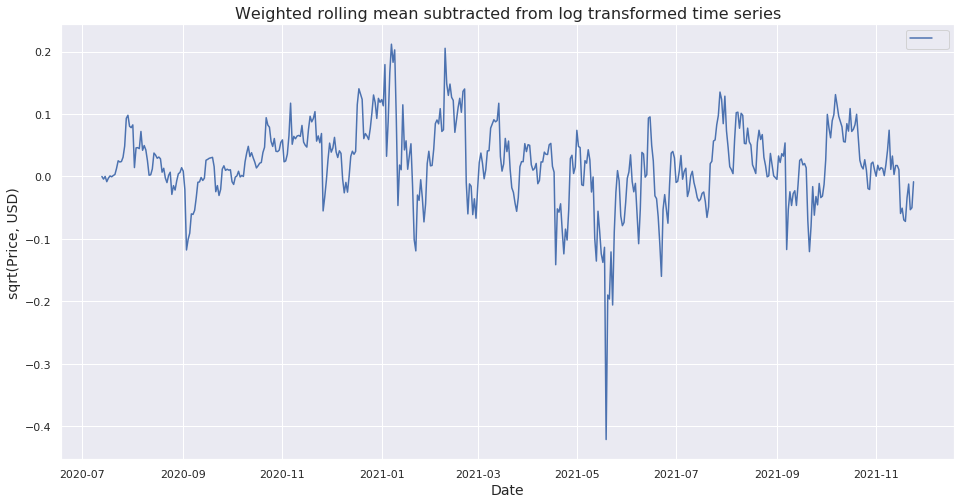

In [69]:
# Subtract the exponential weighted rolling mean from the log transformed data 
ts_log_minus_exp_roll_mean = ts_log - exp_roll_mean

# Plot the time series
plot_ts([[ts_log_minus_exp_roll_mean]], 'Weighted rolling mean subtracted from log transformed time series', ylabel='sqrt(Price, USD)')

Check for stationarity of `ts_log_minus_exp_roll_mean`

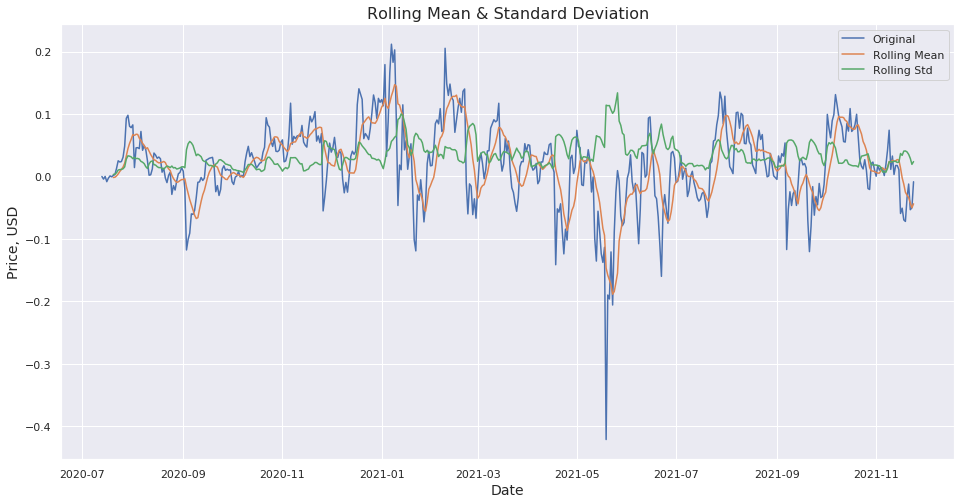

Test Statistic                  -4.461032
p-value                          0.000231
#Lags Used                       8.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64

In [70]:
check_stationarity(ts_log_minus_exp_roll_mean)

##### p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test, <br>But just rolling mean performs better with specifically this data

## Differencing

Using moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now let's use differencing to remove seasonality.

In [71]:
# Difference data
data_diff = ts_log_minus_exp_roll_mean.diff(periods=1)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head()

,close
timestamp,
2020-07-14,-0.004190
2020-07-15,0.004304
2020-07-16,-0.008426
2020-07-17,0.005721
2020-07-18,0.003534


Plot the resulting differenced time series. 

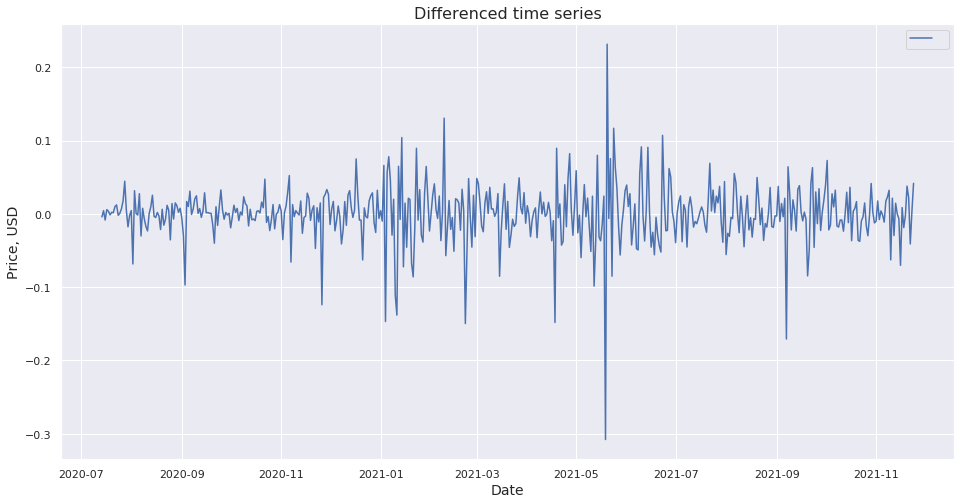

In [72]:
plot_ts([[data_diff]], 'Differenced time series')

Perform the stationarity check

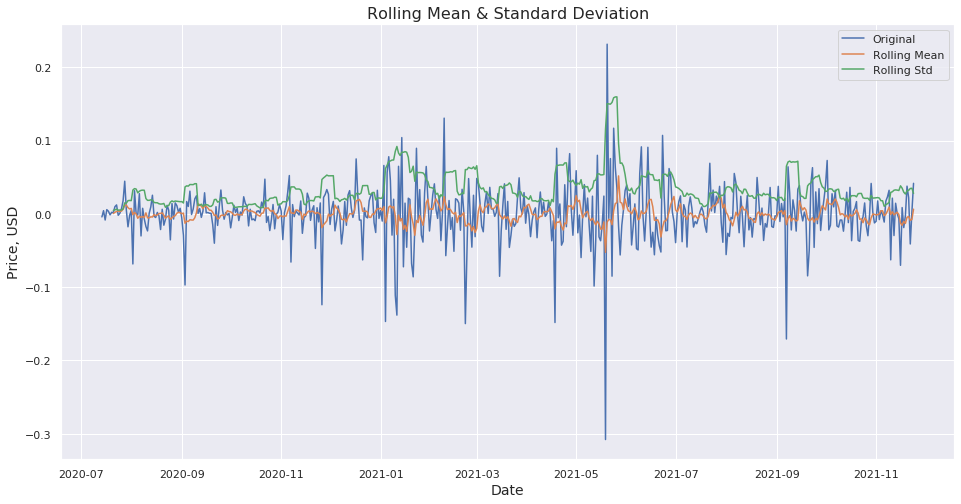

Test Statistic                -1.064440e+01
p-value                        4.837248e-19
#Lags Used                     7.000000e+00
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64

In [73]:

check_stationarity(data_diff)

##### p-value of the Dickey-Fuller test is 4.837248e-19 what is <0.05, so this series seems to be stationary according to this test.

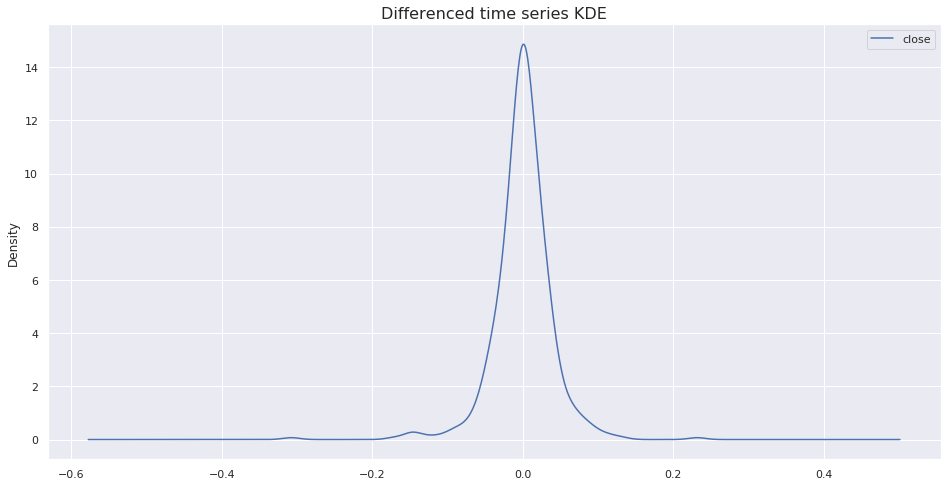

In [74]:
kde_plot_ts(data_diff, 'Differenced time series KDE')

##### KDE plot looks good to me.

In [75]:
data_diff.describe()

,close
count,499.000000
mean,-0.000017
std,0.039467
min,-0.307853
25%,-0.016067
50%,0.001426
75%,0.017870
max,0.231407


#### Save processed data

In [79]:
data_diff.to_csv('processed_data/BTCUSDT_1h.csv')